# Tutorial

Inspired from PyTorch Geometric [series of tutorials](https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html).

### Load useful libraries

In [1]:
#Execute the following line codes if executing in Python environment where pytorch_geometric is not installed
#pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [2]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Part 1: Data Handling in PyG

### Data

Let's create a dummy graph $\mathcal{G}=(\mathcal{V},\mathcal{E})$ such as $|\mathcal{V}|=100$,$|\mathcal{E}|=500$.<br>
The embedding of a node $u$ is defined as $h_u \in \mathbb{R}^d$, where $d=16$.

In [3]:
#create embeddings
embeddings = torch.rand((10, 16), dtype=torch.float) #sample values in the an uniform distribution [0,1)
embeddings.shape
#each node is indexed

torch.Size([10, 16])

In [4]:
#create edges from an edge list (alternative to the adjacency list)
#An edge list represents a network as a list of edges in a two-column matrix. 
#so that each pair (u,v) represents the edge {u->v} /!\ pay attention to the order (to represent undirected graph, the two directions should be specified)
#we use the index from embeddings order
#format: required long int
rows = np.random.choice(10, 15)
cols = np.random.choice(10, 15)
edges = torch.tensor([rows, cols])
edges.shape

/var/folders/5g/lb5rqdn537gdsvb2ylrqtblm0000gn/T/ipykernel_79023/2488675919.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1726558671003/work/torch/csrc/utils/tensor_new.cpp:257.)
  edges = torch.tensor([rows, cols])


torch.Size([2, 15])

In [5]:
edges

tensor([[8, 5, 5, 4, 0, 6, 2, 8, 1, 9, 2, 7, 5, 6, 6],
        [6, 0, 8, 5, 6, 8, 8, 6, 8, 0, 5, 0, 5, 1, 6]])

In [6]:
#label attached to each node
ys = torch.rand((10)).round()

Convert the graph information into a PyG Data object

In [7]:
graph = data.Data(x=embeddings, edge_index=edges, y=ys) #possibility to add attribute on edges
#x (torch.Tensor, optional): Node feature matrix with shape [num_nodes, num_node_features]
#edge_index (LongTensor, optional): Graph connectivity with shape [2, num_edges]
#y (torch.Tensor, optional): Graph-level or node-level ground-truth labels with arbitrary shape (e.g., [num_nodes].  

In [8]:
graph

Data(x=[10, 16], edge_index=[2, 15], y=[10])

Let's visualize the information contained in the data object

In [9]:
for prop in graph:
    print(prop)

('x', tensor([[0.4571, 0.9859, 0.4883, 0.4523, 0.4795, 0.0673, 0.5519, 0.6325, 0.4977,
         0.4223, 0.0186, 0.2238, 0.0389, 0.0832, 0.5070, 0.7709],
        [0.5750, 0.7664, 0.9059, 0.4315, 0.4948, 0.3044, 0.0991, 0.7071, 0.7567,
         0.6729, 0.0559, 0.7368, 0.9438, 0.7687, 0.0259, 0.5462],
        [0.7364, 0.1730, 0.3943, 0.1882, 0.0817, 0.3216, 0.2056, 0.6350, 0.2591,
         0.2558, 0.2852, 0.3759, 0.8143, 0.8052, 0.5536, 0.7408],
        [0.1922, 0.4875, 0.4816, 0.4665, 0.4354, 0.0218, 0.2175, 0.7576, 0.8697,
         0.2491, 0.3567, 0.7607, 0.3282, 0.8679, 0.4396, 0.7345],
        [0.1693, 0.1346, 0.8581, 0.5450, 0.3439, 0.7083, 0.6015, 0.6260, 0.0502,
         0.4811, 0.7772, 0.8173, 0.7582, 0.3470, 0.4289, 0.2210],
        [0.1736, 0.8065, 0.8591, 0.1928, 0.2525, 0.3776, 0.4578, 0.1101, 0.8325,
         0.9151, 0.1388, 0.9119, 0.2305, 0.5639, 0.0358, 0.5578],
        [0.8965, 0.1277, 0.6095, 0.2513, 0.3329, 0.0839, 0.4403, 0.4968, 0.6304,
         0.4139, 0.9353, 0.4347

You can easily access these elements by calling:

In [10]:
graph.x

tensor([[0.4571, 0.9859, 0.4883, 0.4523, 0.4795, 0.0673, 0.5519, 0.6325, 0.4977,
         0.4223, 0.0186, 0.2238, 0.0389, 0.0832, 0.5070, 0.7709],
        [0.5750, 0.7664, 0.9059, 0.4315, 0.4948, 0.3044, 0.0991, 0.7071, 0.7567,
         0.6729, 0.0559, 0.7368, 0.9438, 0.7687, 0.0259, 0.5462],
        [0.7364, 0.1730, 0.3943, 0.1882, 0.0817, 0.3216, 0.2056, 0.6350, 0.2591,
         0.2558, 0.2852, 0.3759, 0.8143, 0.8052, 0.5536, 0.7408],
        [0.1922, 0.4875, 0.4816, 0.4665, 0.4354, 0.0218, 0.2175, 0.7576, 0.8697,
         0.2491, 0.3567, 0.7607, 0.3282, 0.8679, 0.4396, 0.7345],
        [0.1693, 0.1346, 0.8581, 0.5450, 0.3439, 0.7083, 0.6015, 0.6260, 0.0502,
         0.4811, 0.7772, 0.8173, 0.7582, 0.3470, 0.4289, 0.2210],
        [0.1736, 0.8065, 0.8591, 0.1928, 0.2525, 0.3776, 0.4578, 0.1101, 0.8325,
         0.9151, 0.1388, 0.9119, 0.2305, 0.5639, 0.0358, 0.5578],
        [0.8965, 0.1277, 0.6095, 0.2513, 0.3329, 0.0839, 0.4403, 0.4968, 0.6304,
         0.4139, 0.9353, 0.4347, 0.93

Visualize the graph

<class 'networkx.classes.digraph.DiGraph'>
DiGraph with 10 nodes and 14 edges


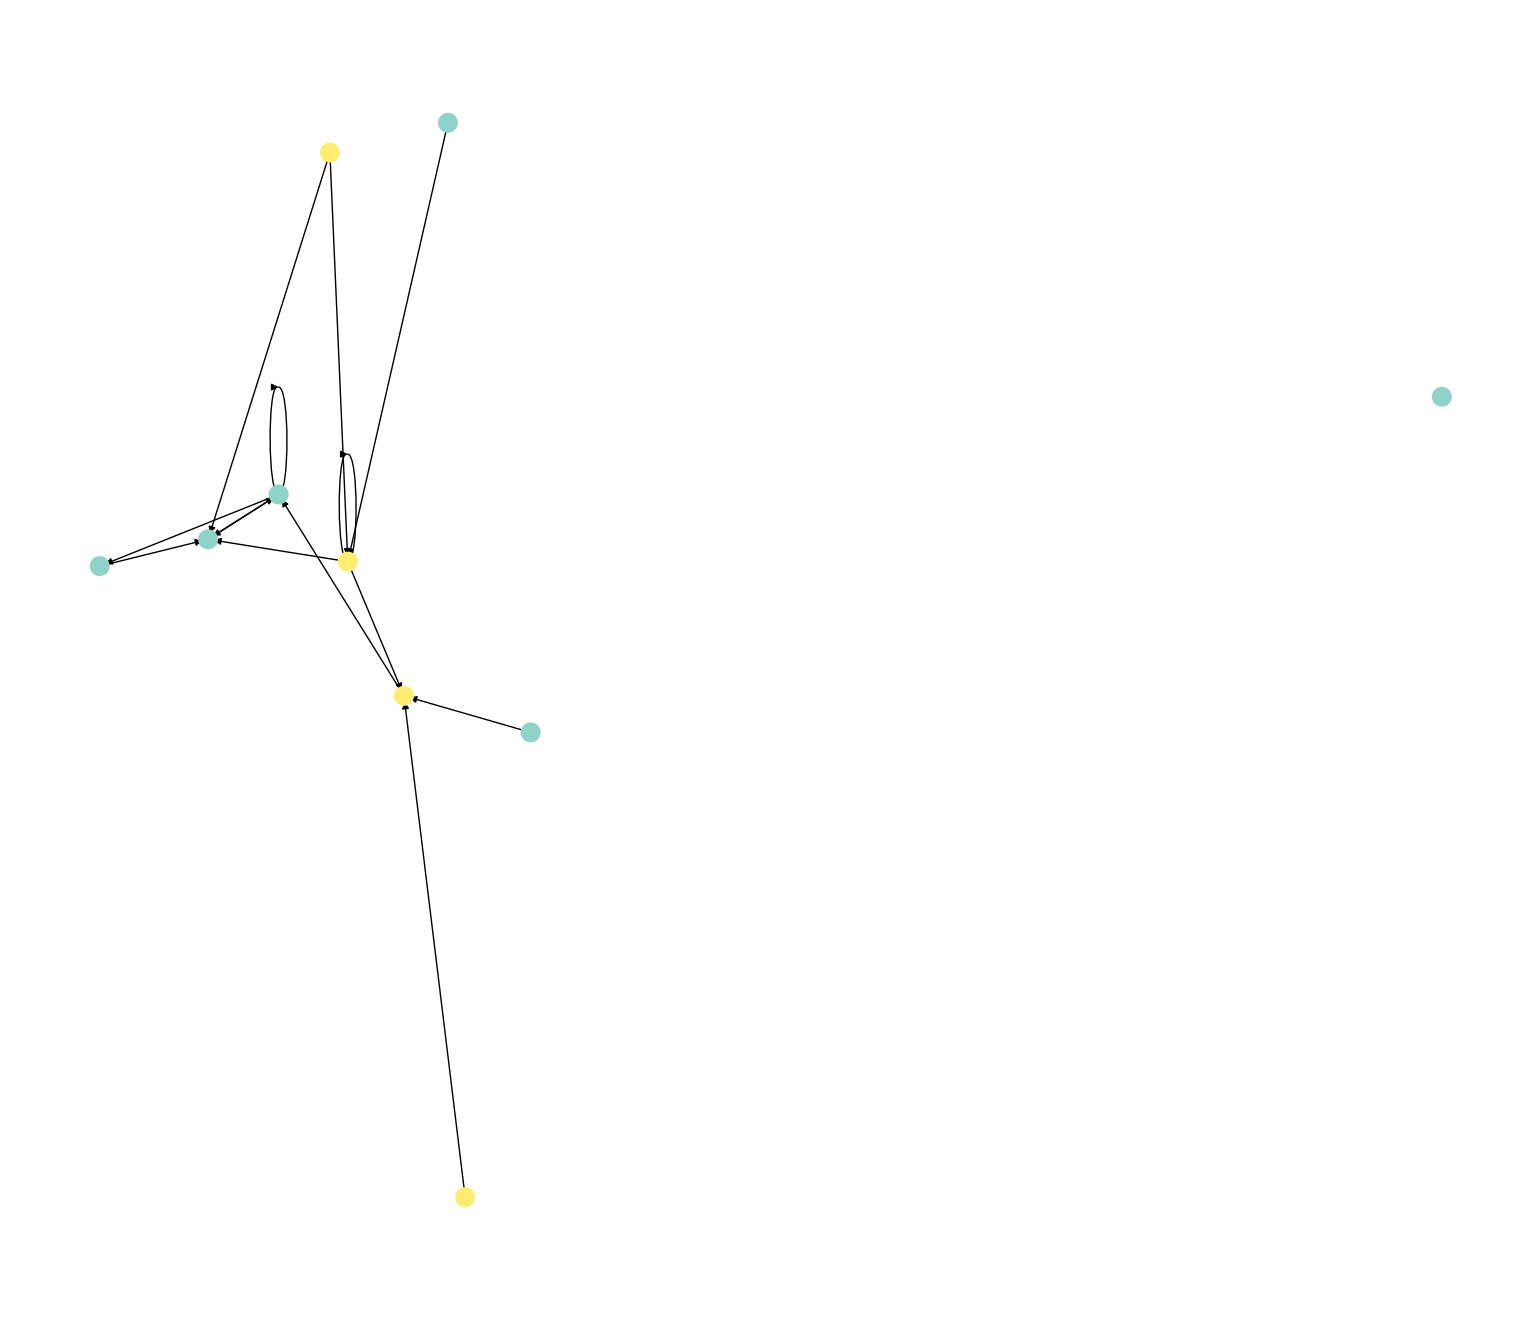

In [11]:
#use networkx function (a Python library to manipulate graphs)
vis = to_networkx(graph)
print(type(vis))#converted to a directed graph
print(vis) 
node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13))
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6) #colors are attributed based on the labels
plt.show()

In [12]:
print(f'Number of nodes: {graph.num_nodes}')
print(f'Number of edges: {graph.num_edges}')
print(f'Size of nodes embedding: {graph.num_node_features}')
print(f'Size of edges embedding: {graph.num_edge_features}')
print(f'Average node degree: {graph.num_edges / graph.num_nodes:.2f}')
print(f'Has isolated nodes: {graph.has_isolated_nodes()}')
print(f'Has self-loops: {graph.has_self_loops()}')
print(f'Is undirected: {graph.is_undirected()}')

Number of nodes: 10
Number of edges: 15
Size of nodes embedding: 16
Size of edges embedding: 0
Average node degree: 1.50
Has isolated nodes: True
Has self-loops: True
Is undirected: False


How to make this graph undirected?

In [13]:
# Reverse the source and target nodes
reversed_edges = edges.flip(0)

# Concatenate the original and reversed edges
duplicated_edges = torch.cat((edges, reversed_edges), dim=1)

print(duplicated_edges)

tensor([[8, 5, 5, 4, 0, 6, 2, 8, 1, 9, 2, 7, 5, 6, 6, 6, 0, 8, 5, 6, 8, 8, 6, 8,
         0, 5, 0, 5, 1, 6],
        [6, 0, 8, 5, 6, 8, 8, 6, 8, 0, 5, 0, 5, 1, 6, 8, 5, 5, 4, 0, 6, 2, 8, 1,
         9, 2, 7, 5, 6, 6]])


In [14]:
graph_undirected = data.Data(x=embeddings, edge_index=duplicated_edges, y=ys) #possibility to add attribute on edges
graph_undirected.is_undirected()

True

Check the connectivity of the graph

In [37]:
from torch_geometric.utils import connected_components
#import networkx as nx

ImportError: cannot import name 'connected_components' from 'torch_geometric.utils' (/opt/anaconda3/lib/python3.11/site-packages/torch_geometric/utils/__init__.py)

In [36]:
# Get the connected components of the graph
#num_components = connected_components(graph.edge_index)
num_components = nx.is_connected(graph)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    async_ :  Bool (Experimental)
                ^^^^^^^^^^^^^^^^^^
  File "/var/folders/5g/lb5rqdn537gdsvb2ylrqtblm0000gn/T/ipykernel_79023/2879971993.py", line 3, in <module>
    num_components = nx.is_connected(graph)
                     ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/networkx/classes/backends.py", line 148, in wrapper
  File "<class 'networkx.utils.decorators.argmap'> compilation 16", line 3, in argmap_is_connected_13
    import gzip
         ^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/networkx/utils/decorators.py", line 86, in _not_implemented_for
networkx.exception.NetworkXNotImplemented: not implemented for directed type

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/

Note that [NetworkX](https://networkx.org/documentation/stable/index.html) proposes further functions for example to extract the connected components

The two libraries can be used alongside each other.<br>
PyTorch Geometric is more suitable if you're already working with this library for graph-based tasks.<br>
NetworkX is a more general-purpose library for graph analysis and can be used alongside PyTorch if you need advanced graph algorithms.

### Batch

With the Batch object we can represent multiple graphs as a single disconnected graph

In [20]:
graph2 = graph

In [21]:
batch = data.Batch().from_data_list([graph, graph2])#the batch_size can be specified

In [22]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

Number of graphs: 2
Graph at index 1: Data(x=[10, 16], edge_index=[2, 15], y=[10])
Retrieve the list of graphs:
 2


### Datasets

List all the available datasets. <br>
Check online [documentation](https://pytorch-geometric.readthedocs.io/en/2.5.3/cheatsheet/data_cheatsheet.html) for statistics.

In [23]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'AQSOL',
 'MoleculeNet',
 'PCQM4Mv2',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'GDELTLite',
 'ICEWS18',
 'GDELT',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'WordNet18',
 'WordNet18RR',
 'FB15k_237',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'HeterophilousGraphDataset',
 'Actor',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch',
 'Airports',
 'LRGBDataset',
 'MalNetTiny',
 'OMDB',
 'PolBlogs',
 'EmailEUCore',
 'LINKXDataset',
 'Elliptic

In [24]:
len(datasets.__all__)

104

We will explore the `Cora` dataset, which is a **citation network** where nodes represent documents.
Each node is described by a 1433-dimensional bag-of-words feature vector.
Two documents are connected if there exists a citation link between them.
The task attached to this dataset is to infer the category of each document (7 in total).

In [25]:
name = 'Cora'
#transform = transforms.Compose([
#    transforms.AddTrainValTestMask('train_rest', num_val=500, num_test=500),
#    transforms.TargetIndegree(),
#])
cora = datasets.Planetoid('./data', name)#pre_transform=transforms.NormalizeFeatures(), transform=transform

/opt/anaconda3/lib/python3.11/site-packages/torch_geometric/data/dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f, weights_onl

In [26]:
print(f'Cora info: {cora}')
print('======================')
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

data = cora[0]  # Get the first graph object.
print(data)
print('===========================================================================================================')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {graph.num_edges}')
print(f'Size of nodes embedding: {graph.num_node_features}')
print(f'Size of edges embedding: {graph.num_edge_features}')
print(f'Average node degree: {graph.num_edges / graph.num_nodes:.2f}')
print(f'Has isolated nodes: {graph.has_isolated_nodes()}')
print(f'Has self-loops: {graph.has_self_loops()}')
print(f'Is undirected: {graph.is_undirected()}')

Cora info: Cora()
# of graphs: 1
# Classes (nodes) 7
# Edge features 0
# Node features 1433
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 15
Size of nodes embedding: 16
Size of edges embedding: 0
Average node degree: 1.50
Has isolated nodes: True
Has self-loops: True
Is undirected: False


In [27]:
cora_loader = data.DataLoader(cora)

AttributeError: 'GlobalStorage' object has no attribute 'DataLoader'

In [28]:
for l in cora_loader:
    print(l)
    break

NameError: name 'cora_loader' is not defined

In [29]:
l.train_mask.sum().item()

NameError: name 'l' is not defined

In [30]:
l.val_mask.sum().item()

NameError: name 'l' is not defined

In [31]:
l.test_mask.sum().item()

NameError: name 'l' is not defined

This graph holds the additional attributes  `train_mask`, `val_mask` and `test_mask`, where:
- `train_mask` denotes against which nodes to train (140 nodes),
- `val_mask` denotes which nodes to use for validation, e.g., to perform early stopping (500 nodes),
- `test_mask` denotes against which nodes to test (1000 nodes).

We can see that the `Cora` network holds 2,708 nodes and 10,556 edges, resulting in an average node degree of 3.9.
For training this dataset, we are given the ground-truth categories of 140 nodes (20 for each class).
This results in a training node label rate of only 5%.

We can further see that this network is undirected, and that there exists no isolated nodes (each document has at least one citation).

### Mini-batches

Neural networks are usually trained in a batch-wise fashion (using `DataLoader` only for graph-based task). PyG achieves parallelization over a mini-batch by creating sparse block diagonal adjacency matrices (defined by edge_index) and concatenating feature and target matrices in the node dimension. This composition allows differing number of nodes and edges over examples in one batch:

In [ ]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True) #load another famous dataset

Check online documentation for more details about [TUDataset](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.TUDataset.html)

In [ ]:
len(dataset)

In [ ]:
dataset[1]

In [ ]:
loader = data.DataLoader(dataset, batch_size=32, shuffle=True)

for batch in loader:
    print(batch)
    print(batch.num_graphs)
    break

Note that there are possibilies of mini-batching for a node classification task where all nodes belong to the same graph and the graph is quite large, in particular with [`NeighborLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html?highlight=neighbor+loader#torch_geometric.loader.NeighborLoader). In case of relative small graphs, the all graph can fit in memory.<br>
Another approach for large graphs is graph partitioning, where the graph is divided into smaller subgraphs or clusters. You can then use a DataLoader to iterate over these clusters as batches.

### Open Graph Benchmark datasets

Open Graph Benchmark is available as a python library, to install it just run

```pip install ogb```

OGB allows to load a dataset in three ways: for PyG applications, for DGL (Deep Graph Library, another widely used tool for GNNs in python) and in an 'agnostic' manner. There is a naming convention to load a dataset, depending on the task an the dataset name:

    ogbn-[name]: for node tasks
    ogbg-[name]: for graph tasks
    ogbl-[name]: for link tasks

In [ ]:
from ogb.nodeproppred import PygNodePropPredDataset
#from ogb.graphproppred import PygGraphPropPredDataset
#from ogb.linkproppred import PygLinkPropPredDataset

In [ ]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name = dataset_name, root='data')

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph = dataset[0]

In [ ]:
graph

### Benchmarking Graph Neural Networks Datasets

In [ ]:
import torch_geometric.datasets as datasets

datasets.__all__

In [ ]:
datasets.GNNBenchmarkDataset.names

In [ ]:
dataset = datasets.GNNBenchmarkDataset(name='MNIST', root='data')

In [ ]:
dataset